In [1]:
import math as mt
import numpy as np
from matplotlib import pyplot as py
%matplotlib inline
%run ./flow_functions.ipynb

In [91]:
N = 100
xstart, xend, ystart, yend = -2.0,2.0,-0.5,0.5
x,y,X,Y = flowgrid(xstart,xend,ystart,yend,N)

In [92]:
Nv = 151
gamma = 5.0           #strength of vortex
xvortex = np.linspace(10*xstart,10*xend,Nv)
yvortex = np.linspace(0,0,Nv)  #location of vortices
u_temp,v_temp,psi_temp = 0.0,0.0,0.0
u,v,psi = np.ndarray([N,N,Nv],dtype=float),np.ndarray([N,N,Nv],dtype=float),np.ndarray([N,N,Nv],dtype=float)
for i in range (Nv):
    u[:,:,i],v[:,:,i],psi[:,:,i] = get_vel_psi_vortex(gamma,xvortex[i],yvortex[i],X,Y)
    #u_vortex = u_vortex + u_temp
    #v_vortex = u_vortex + u_temp
    #psi_vortex = u_vortex + psi_temp
#U,V,psi = np.sum(u_vortex,axis=2),np.sum(v_vortex,axis=2),np.sum(psi_vortex,axis=2)
U,V = np.sum(u,axis=2),np.sum(v,axis=2)

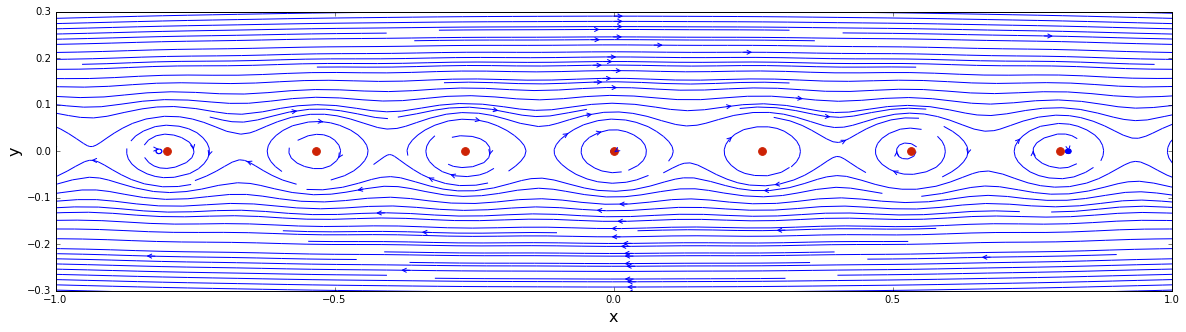

In [95]:
#plotting
size = 20
py.figure(figsize = (size, (yend-ystart)/(xend - xstart)*size))
py.xlabel('x',fontsize = 16)
py.ylabel('y',fontsize = 16)
py.xlim(-1.0,1.0)
py.ylim(-0.3,0.3)
#py.xlim(xstart,xend)
#py.ylim(ystart,yend)
py.streamplot(X,Y,U,V, density = 3, linewidth=1, arrowsize=1, arrowstyle='->')
py.scatter(xvortex ,yvortex, color = '#CD2305', s=60, marker = 'o')

# Infinite

In [80]:
a = np.abs(x[0]-x[1])
u_inf = +gamma/(2*a)*np.sinh(2*np.pi*Y/a)/(np.cosh(2*np.pi*Y/a)-np.cos(2*np.pi*X/a))
v_inf = -gamma/(2*a)*(np.sin(2*np.pi*X/a)/(np.cosh(2*np.pi*Y/a)-np.cos(2*np.pi*X/a)))

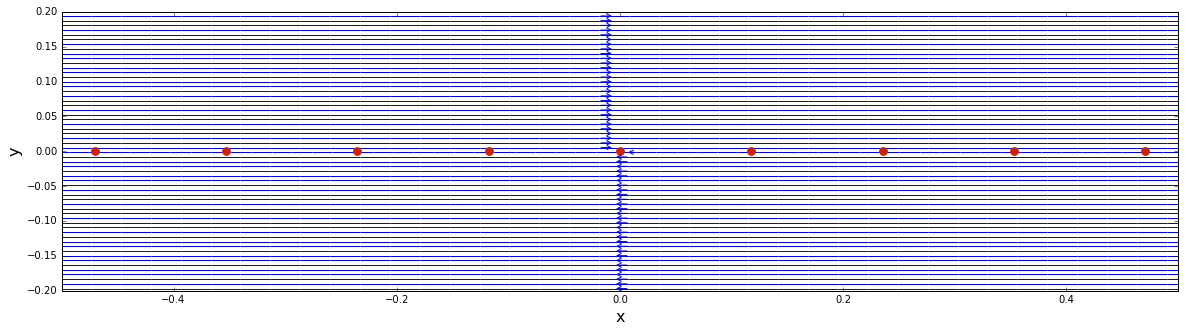

In [81]:
py.figure(figsize = (size, (yend-ystart)/(xend - xstart)*size))
py.xlabel('x',fontsize = 16)
py.ylabel('y',fontsize = 16)
py.xlim(-0.5,0.5)
py.ylim(-0.2,0.2)
#py.xlim(xstart,xend)
#py.ylim(ystart,yend)
py.streamplot(X,Y,u_inf,v_inf, density = 5, linewidth=1, arrowsize=1, arrowstyle='->')
py.scatter(xvortex ,yvortex, color = '#CD2305', s=60, marker = 'o')